Reference: https://www.coursera.org/learn/linear-regression-numpy-python

This was a free guided project provided through coursera. Please check out, complete and leave a good review at original reference if you have found this project helpful.

This project is separated into the following sections:

1. Importing necessary libraries and loading the data
2. Visualizing the data
3. Understanding and computing the cost function of linear regression
4. Understanding gradient descent and how to minimize cost function using this technique.
5. Visualizing the cost function
6. Plotting the convergence of gradient descent.
7. Training a linear regression model to fit the data
8. Predicting output using the trained model

### Section 1 : Importing Libraries and Loading Data
---

In [5]:
# Data Processing and Computation Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting Global Plot Style
sns.set()
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

Here we will use pandas to read a text file containing some precollected data. CSV(Comma Seperated Values) more appropriately indicates the inner structure of the data instead of a file extension name. If we inspect the text file we will see that the data is separated by commas, which allows us to read this .txt file as a CSV file using pandas.

Using the type() function of python reveals that the df variable we have used to store our loaded data has the class 'pandas.core.frame.DataFrame', which simply means that it is a DataFrame object. 

In [6]:
df = pd.read_csv("bike_sharing_data.txt")

print(type(df))

# Only to ensure that output shows up on github
print(str(type(df)).replace("<","").replace(">",""))

# Jupyter notebook provides display() function for richer outputs compared to print()
print(df.head(10))
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
class 'pandas.core.frame.DataFrame'
   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
5      8.3829  11.8860
6      7.4764   4.3483
7      8.5781  12.0000
8      6.4862   6.5987
9      5.0546   3.8166


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


The DataFrame class provides a huge collection of builtin methods and attributes to make data analysis easier. One of the methods we use below is DataFrame.info(), which gives us a simple yet important overview of the DataFrame object.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


From the above output we can see that we have two columns in our dataset. One is 'Population' and the other is 'Profit'. There are a total of 97 samples in our dataset both columns contain data of type 'float64'. Furthermore, there are no 'null' values in any of the columns, which means we will not have to process this dataset before working on it.

### Section 2 : Visualizing the dataset
---

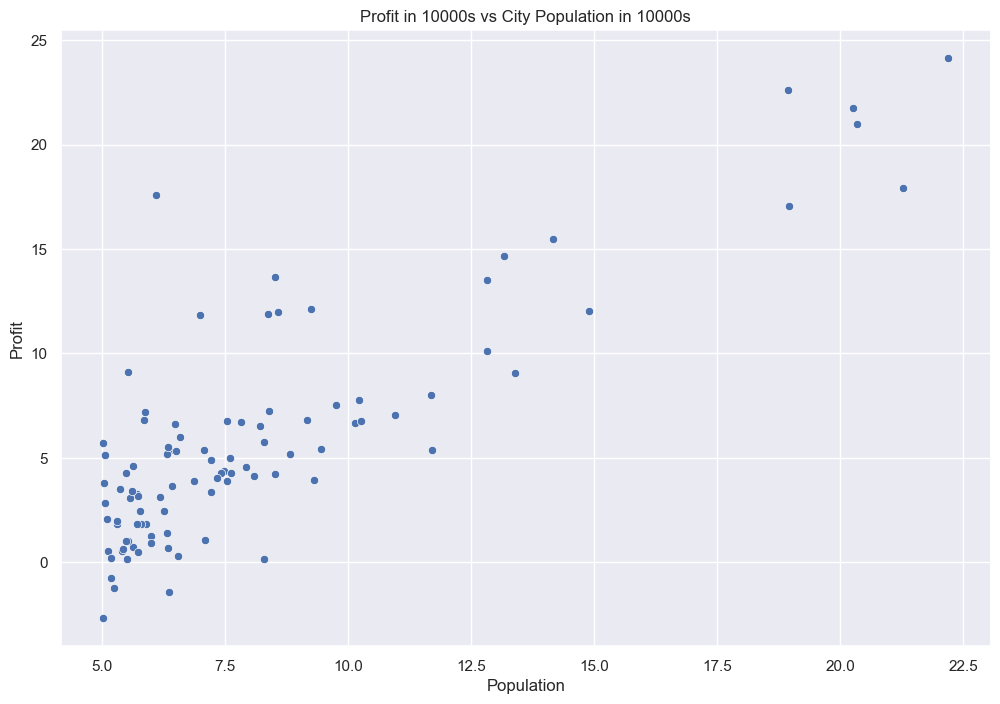

In [8]:
sns.scatterplot(x="Population", y="Profit", data=df)
plt.title("Profit in 10000s vs City Population in 10000s")
plt.show()

The scatter plot reveals that there is an almost linear relation between population and profit, which implies that we may be able to get good predictions by training a linear regression model on this dataset.

### Section 3 : Cost Function
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [9]:
def cost_function(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> float:
    
    m = len(y)

    y_pred = np.dot(X, theta)
    error = (y_pred - y) ** 2

    cost = (1/(2*m)) * np.sum(error)

    return cost

In [13]:
print(df.shape)
print(df.shape[0])
print(df.shape[1])

(97, 2)
97
2


In [18]:
x_data = df['Population']
print(type(x_data))

display(x_data)

x_data = df['Population'].values
print(type(x_data))
display(x_data)

m = df.shape[0]
x_data = x_data.reshape(m, 1)
display(x_data)

<class 'pandas.core.series.Series'>


0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598
       ...   
92     5.8707
93     5.3054
94     8.2934
95    13.3940
96     5.4369
Name: Population, Length: 97, dtype: float64

<class 'numpy.ndarray'>


array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

array([[ 6.1101],
       [ 5.5277],
       [ 8.5186],
       [ 7.0032],
       [ 5.8598],
       [ 8.3829],
       [ 7.4764],
       [ 8.5781],
       [ 6.4862],
       [ 5.0546],
       [ 5.7107],
       [14.164 ],
       [ 5.734 ],
       [ 8.4084],
       [ 5.6407],
       [ 5.3794],
       [ 6.3654],
       [ 5.1301],
       [ 6.4296],
       [ 7.0708],
       [ 6.1891],
       [20.27  ],
       [ 5.4901],
       [ 6.3261],
       [ 5.5649],
       [18.945 ],
       [12.828 ],
       [10.957 ],
       [13.176 ],
       [22.203 ],
       [ 5.2524],
       [ 6.5894],
       [ 9.2482],
       [ 5.8918],
       [ 8.2111],
       [ 7.9334],
       [ 8.0959],
       [ 5.6063],
       [12.836 ],
       [ 6.3534],
       [ 5.4069],
       [ 6.8825],
       [11.708 ],
       [ 5.7737],
       [ 7.8247],
       [ 7.0931],
       [ 5.0702],
       [ 5.8014],
       [11.7   ],
       [ 5.5416],
       [ 7.5402],
       [ 5.3077],
       [ 7.4239],
       [ 7.6031],
       [ 6.3328],
       [ 6

In [19]:
print(np.ones((m, 1)))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [21]:
m = df.shape[0]
x_data = df['Population'].values.reshape(m, 1)
X = np.append(np.ones((m, 1)), x_data, axis = 1)
print(X)

[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

In [25]:
y = df['Profit'].values.reshape(m, 1)

print(y)

[[17.592  ]
 [ 9.1302 ]
 [13.662  ]
 [11.854  ]
 [ 6.8233 ]
 [11.886  ]
 [ 4.3483 ]
 [12.     ]
 [ 6.5987 ]
 [ 3.8166 ]
 [ 3.2522 ]
 [15.505  ]
 [ 3.1551 ]
 [ 7.2258 ]
 [ 0.71618]
 [ 3.5129 ]
 [ 5.3048 ]
 [ 0.56077]
 [ 3.6518 ]
 [ 5.3893 ]
 [ 3.1386 ]
 [21.767  ]
 [ 4.263  ]
 [ 5.1875 ]
 [ 3.0825 ]
 [22.638  ]
 [13.501  ]
 [ 7.0467 ]
 [14.692  ]
 [24.147  ]
 [-1.22   ]
 [ 5.9966 ]
 [12.134  ]
 [ 1.8495 ]
 [ 6.5426 ]
 [ 4.5623 ]
 [ 4.1164 ]
 [ 3.3928 ]
 [10.117  ]
 [ 5.4974 ]
 [ 0.55657]
 [ 3.9115 ]
 [ 5.3854 ]
 [ 2.4406 ]
 [ 6.7318 ]
 [ 1.0463 ]
 [ 5.1337 ]
 [ 1.844  ]
 [ 8.0043 ]
 [ 1.0179 ]
 [ 6.7504 ]
 [ 1.8396 ]
 [ 4.2885 ]
 [ 4.9981 ]
 [ 1.4233 ]
 [-1.4211 ]
 [ 2.4756 ]
 [ 4.6042 ]
 [ 3.9624 ]
 [ 5.4141 ]
 [ 5.1694 ]
 [-0.74279]
 [17.929  ]
 [12.054  ]
 [17.054  ]
 [ 4.8852 ]
 [ 5.7442 ]
 [ 7.7754 ]
 [ 1.0173 ]
 [20.992  ]
 [ 6.6799 ]
 [ 4.0259 ]
 [ 1.2784 ]
 [ 3.3411 ]
 [-2.6807 ]
 [ 0.29678]
 [ 3.8845 ]
 [ 5.7014 ]
 [ 6.7526 ]
 [ 2.0576 ]
 [ 0.47953]
 [ 0.20421]
 [ 0.67861]
 [ 7

In [22]:
y = df['Profit'].values.reshape(m, 1)
print(y)

[[17.592  ]
 [ 9.1302 ]
 [13.662  ]
 [11.854  ]
 [ 6.8233 ]
 [11.886  ]
 [ 4.3483 ]
 [12.     ]
 [ 6.5987 ]
 [ 3.8166 ]
 [ 3.2522 ]
 [15.505  ]
 [ 3.1551 ]
 [ 7.2258 ]
 [ 0.71618]
 [ 3.5129 ]
 [ 5.3048 ]
 [ 0.56077]
 [ 3.6518 ]
 [ 5.3893 ]
 [ 3.1386 ]
 [21.767  ]
 [ 4.263  ]
 [ 5.1875 ]
 [ 3.0825 ]
 [22.638  ]
 [13.501  ]
 [ 7.0467 ]
 [14.692  ]
 [24.147  ]
 [-1.22   ]
 [ 5.9966 ]
 [12.134  ]
 [ 1.8495 ]
 [ 6.5426 ]
 [ 4.5623 ]
 [ 4.1164 ]
 [ 3.3928 ]
 [10.117  ]
 [ 5.4974 ]
 [ 0.55657]
 [ 3.9115 ]
 [ 5.3854 ]
 [ 2.4406 ]
 [ 6.7318 ]
 [ 1.0463 ]
 [ 5.1337 ]
 [ 1.844  ]
 [ 8.0043 ]
 [ 1.0179 ]
 [ 6.7504 ]
 [ 1.8396 ]
 [ 4.2885 ]
 [ 4.9981 ]
 [ 1.4233 ]
 [-1.4211 ]
 [ 2.4756 ]
 [ 4.6042 ]
 [ 3.9624 ]
 [ 5.4141 ]
 [ 5.1694 ]
 [-0.74279]
 [17.929  ]
 [12.054  ]
 [17.054  ]
 [ 4.8852 ]
 [ 5.7442 ]
 [ 7.7754 ]
 [ 1.0173 ]
 [20.992  ]
 [ 6.6799 ]
 [ 4.0259 ]
 [ 1.2784 ]
 [ 3.3411 ]
 [-2.6807 ]
 [ 0.29678]
 [ 3.8845 ]
 [ 5.7014 ]
 [ 6.7526 ]
 [ 2.0576 ]
 [ 0.47953]
 [ 0.20421]
 [ 0.67861]
 [ 7

In [23]:
theta = np.zeros((2, 1))
print(theta)

[[0.]
 [0.]]


In [26]:
cost = cost_function(X, y, theta)
print(f"The value of the cost function currently is: {cost:.4f}")

The value of the cost function currently is: 32.0727


### Section 4 : Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [27]:
def gradient_descent(X: np.ndarray, y: np.ndarray, theta: np.ndarray, learning_rate: float, iterations: int):
    m = len(y)
    costs = []
    for _ in range(iterations):
        y_pred = np.dot(X, theta)
        error = np.dot(np.transpose(X), (y_pred - y))
        theta = theta - (learning_rate * (1/m) * error)
        costs.append(cost_function(X, y, theta))
    return theta, costs


In [28]:
learning_rate = 0.01
iterations = 2000
theta, costs = gradient_descent(X=X, y=y, theta=theta, learning_rate=learning_rate, iterations=iterations)
paramater_1 = theta[0, 0]
parameter_2 = theta[1, 0]
print(f"The value of parameters are {paramater_1:.2f} and {parameter_2:.2f}")
print(f"The linear regression model after gradient descent is: {paramater_1:.2f} + {parameter_2:.2f}x")

The value of parameters are -3.79 and 1.18
The linear regression model after gradient descent is: -3.79 + 1.18x


In [29]:
print(theta)
print(costs)

[[-3.78806857]
 [ 1.18221277]]
[6.737190464870003, 5.9315935686049555, 5.901154707081388, 5.895228586444221, 5.8900949431173295, 5.885004158443647, 5.879932480491418, 5.874879094762575, 5.869843911806385, 5.86482686531293, 5.8598278899321805, 5.85484692057229, 5.849883892376585, 5.844938740722034, 5.840011401218361, 5.835101809707226, 5.830209902261388, 5.825335615183863, 5.820478885007098, 5.815639648492154, 5.810817842627869, 5.806013404630044, 5.801226271940628, 5.796456382226898, 5.7917036733806535, 5.7869680835173956, 5.782249550975539, 5.777548014315596, 5.7728634123193805, 5.768195683989212, 5.76354476854712, 5.758910605434047, 5.754293134309077, 5.749692295048628, 5.745108027745684, 5.740540272709012, 5.735988970462381, 5.731454061743792, 5.726935487504702, 5.722433188909257, 5.717947107333528, 5.713477184364749, 5.709023361800549, 5.704585581648198, 5.7001637861238565, 5.695757917651815, 5.691367918863752, 5.68699373259798, 5.682635301898707, 5.678292570015292, 5.6739654804015

### Section 5: Visualising the Cost Function $J(\theta)$
---

In [30]:
from mpl_toolkits.mplot3d import Axes3D

In [31]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

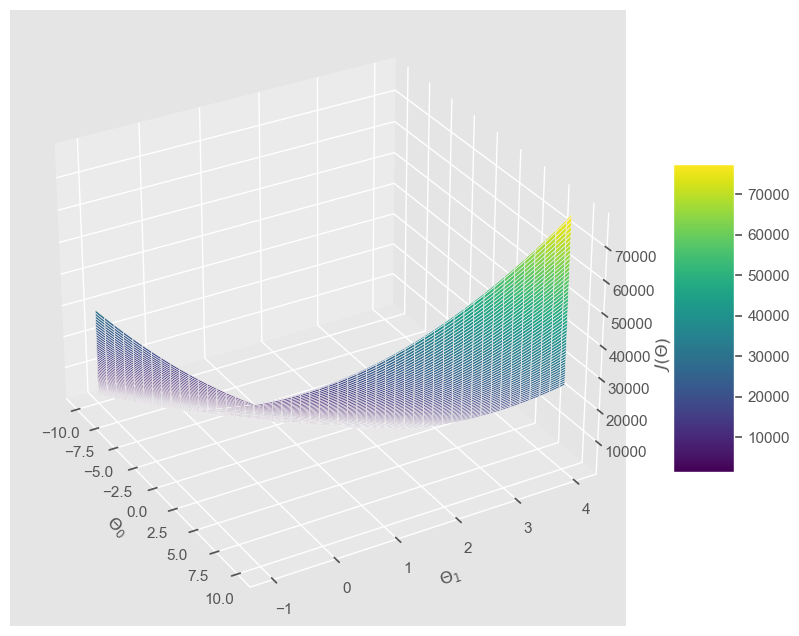

In [32]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection="3d")

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
ax.set_zlabel('$J(\Theta)$')
ax.view_init(30, 330)

plt.show()

### Section 6 : Plotting the Convergence
---

We can see that the gradient descent algorithm produces successive values of cost function that converge to a specific value, which is our global minimum for the cost function.

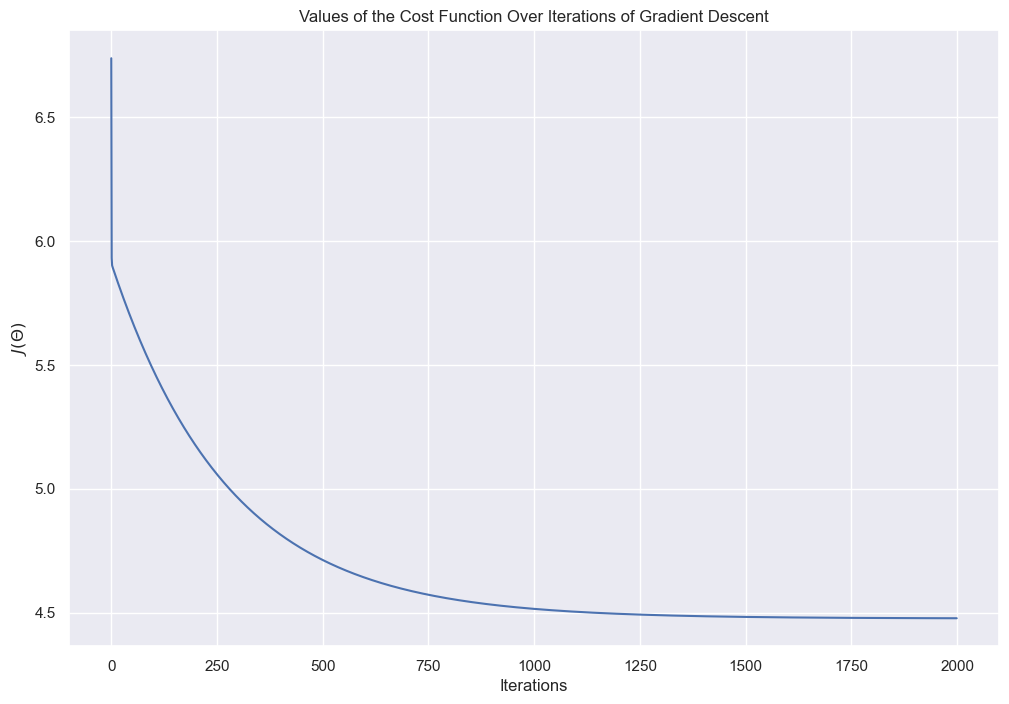

In [26]:
sns.set()
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost Function Over Iterations of Gradient Descent")
plt.show()

### Section 7 : Training Data with Linear Regression Fit
---

Here we plot the straight line using our optimized parameters obtained using gradient descent along with a scatter plot of training data, to see how closely clustered the training points are to our trained linear model.

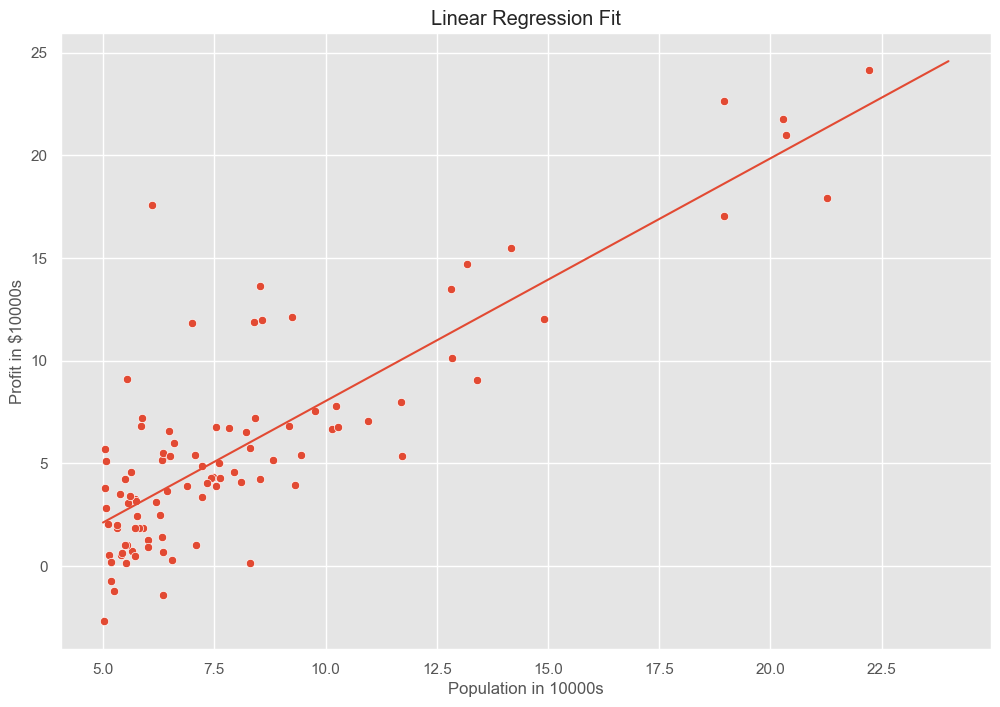

In [33]:
theta = np.squeeze(theta)
sns.scatterplot(x="Population", y="Profit", data=df)

x_value = [x for x in range(5, 25)]
y_value = [(x*theta[1] + theta[0]) for x in x_value] 
sns.lineplot(x=x_value, y=y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10000s")
plt.title("Linear Regression Fit")
plt.show()

### Section 8: Predictions using the optimized $\theta$ values
---

In [34]:
def predict(x, theta):
    y_pred = np.dot(np.transpose(theta), x)
    return y_pred

In [35]:
y_pred_1 = predict(np.array([1, 4]), theta) * 10000
print(f"For a population of 40000 the model predicts a profit of ${y_pred_1:.0f}")

For a population of 40000 the model predicts a profit of $9408


In [36]:
y_pred_2 = predict(np.array([1, 8.3]), theta) * 10000
print(f"For a population of 83,000 people, the model predicts a profit of ${y_pred_2:.0f}")

For a population of 83,000 people, the model predicts a profit of $60243
